In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv("name_gender_dataset.csv",encoding='utf-8-sig')
has_special_character = df['Name'].str.contains('[^a-zA-Z0-9\s]', regex=True).any()

# Print the result
print(has_special_character)

True


In [2]:
df.head(10)

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567
5,Mary,F,4169663,0.011411
6,David,M,3787547,0.010366
7,Joseph,M,2695970,0.007378
8,Richard,M,2638187,0.007220
9,Charles,M,2433540,0.006660


In [6]:
print("Longest name:", len(max(df['Name'], key=lambda x: len(x))))

Longest name: 25


In [7]:
df.shape[0]

147269

In [8]:
print(df.shape[0]-len(df['Name'].unique()))

13359


In [4]:
print(df[df['Name'] == 'Jacob'])

       Name Gender   Count  Probability
46    Jacob      M  975297     0.002669
6521  Jacob      F    2409     0.000007


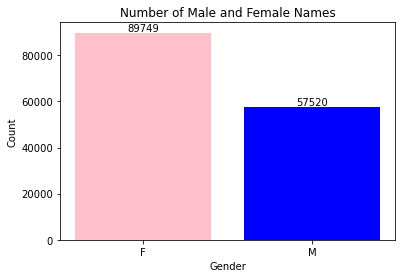

In [18]:
import matplotlib.pyplot as plt

# Count the number of male and female values
gender_counts = df['Gender'].value_counts()

colors = ['pink', 'blue']

plt.bar(gender_counts.index, gender_counts.values, color=colors)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Male and Female Names')

for i, count in enumerate(gender_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [21]:
df.isnull().sum()

Name           0
Gender         0
Count          0
Probability    0
dtype: int64

In [3]:
import pickle

In [4]:
model = pickle.load(open('CNN.pkl','rb'))

In [6]:
def preprocess_name(name):
    name = name.lower()
    name = list(name)
    name_length = 50
    name = (name + [' ']*name_length)[:name_length]
    name = [max(0, ord(char.lower()) - ord('a') + 1) for char in name]
    return name

In [22]:
import numpy as np
name = "Alex"

# Preprocess the name
preprocessed_name = preprocess_name(name)

# Reshape the input to match the expected shape
X_pred = np.reshape(preprocessed_name, (1, -1))

# Make the prediction
prediction = model.predict(X_pred)

# Obtain the gender label and probability
gender_label = "Male" if prediction >= 0.5 else "Female"
print(gender_label)

1/1 [==============================] - 0s 50ms/step
Female


In [50]:
df['Name'] = df['Name'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
has_special_character = df['Name'].str.contains('[^a-zA-Z0-9\s]', regex=True).any()

# Print the result
print(has_special_character)

duplicate_indexes = df[df.duplicated(subset='Name', keep=False)].index
print(len(duplicate_indexes))

False
26909


In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:

sorted_df = df.sort_values(by='Probability', ascending=False)
deduplicated_df = sorted_df.drop_duplicates(subset='Name', keep='first')
selected_names = deduplicated_df.groupby('Name')['Gender','Probability'].first().reset_index()
selected_names

,Name,Gender,Probability
0,A,M,5.473480e-09
1,A'Aff,F,2.736740e-09
2,A'Aron,M,2.736740e-09
3,A'Dele,F,2.736740e-09
4,A'Isha,F,2.736740e-09
...,...,...,...
133905,Zyvion,M,1.368370e-08
133906,Zyvon,M,1.915720e-08
133907,Zyyanna,F,1.642040e-08
133908,Zyyon,M,1.642040e-08


In [41]:

duplicate_indexes = selected_names[selected_names.duplicated(subset='Name', keep=False)].index
print(duplicate_indexes)

Int64Index([], dtype='int64')


In [25]:
special_characters = df['Name'].str.contains('[^a-zA-Z0-9\s]', regex=True)

# Filter the DataFrame to get the rows with names containing special characters
special_df = df[special_characters]['Name']
special_df

8347               Jo-Anne
11547               Jo-Ann
17981           Anne-Marie
18010                  Zoà
20482             Lee-Anne
                ...       
147168           Zhen-Xuan
147196          Ziggy-John
147235    Zoran-Aleksandar
147236          Zoran-Zoki
147260          Zyad-Sammy
Name: Name, Length: 7741, dtype: object

In [42]:
def preprocess(names_df, train=True):
    names_df['Name'] = names_df['Name'].astype(str)
    # Step 1: Lowercase
    names_df['Name'] = names_df['Name'].str.lower()

    # Step 2: Split individual characters
    names_df['Name'] = [list(name) for name in names_df['Name']]

    # Step 3: Pad names with spaces to make all names same length
    name_length = 50
    names_df['Name'] = [
        (name + [' ']*name_length)[:name_length] 
        for name in names_df['Name']
    ]

    # Step 4: Encode Characters to Numbers
    names_df['Name'] = names_df['Name'].apply(lambda x: [max(0,ord(char.lower()) - ord('a') + 1) for char in x])
    
    if train:
        # Step 5: Encode Gender to Numbers
        names_df['Gender'] = [
            0.0 if gender=='F' else 1.0 
            for gender in names_df['Gender']
        ]
    
    return names_df

names_df = preprocess(selected_names)
names_df.head()

,Name,Gender,Probability
0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,5.473480e-09
1,"[1, 1, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,2.736740e-09
2,"[1, 1, 18, 15, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,2.736740e-09
3,"[1, 4, 5, 12, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.0,2.736740e-09
4,"[1, 9, 19, 8, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.0,2.736740e-09


In [79]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam

def lstm_model(num_alphabets=27, name_length=50, embedding_dim=256):
    model = Sequential([
        Embedding(num_alphabets, embedding_dim, input_length=name_length),
        Bidirectional(LSTM(units=128, recurrent_dropout=0.2, dropout=0.2)),
        Dense(1, activation="sigmoid")
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

In [80]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Instantiate the model
model = lstm_model(num_alphabets=27, name_length=50, embedding_dim=256)

# Step 2: Split Training and Test Data
X = np.asarray(names_df['Name'].values.tolist())
y = np.asarray(names_df['Gender'].values.tolist())

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

# Step 3: Train the model
callbacks = [
    EarlyStopping(monitor='val_accuracy',
                  min_delta=1e-3,
                  patience=5,
                  mode='max',
                  restore_best_weights=True,
                  verbose=1),
]

history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=64,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=callbacks)

# Step 4: Save the model
#model.save('boyorgirl.h5')

# Step 5: Plot accuracies
#plt.plot(history.history['accuracy'], label='train')
#plt.plot(history.history['val_accuracy'], label='val')
#plt.xlabel('Epochs')
#plt.ylabel('Accuracy')
#plt.legend()


Epoch 1/50
 201/1841 [==>...........................] - ETA: 25:57 - loss: 0.5844 - accuracy: 0.6854

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_4/embedding_4/embedding_lookup' defined at (most recent call last):
    File "C:\Users\ASUS\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\ASUS\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\ASUS\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\ASUS\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\ASUS\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\ASUS\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\ASUS\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_7788\337382704.py", line 28, in <cell line: 28>
      history = model.fit(x=X_train,
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\layers\core\embedding.py", line 272, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_4/embedding_4/embedding_lookup'
indices[34,1] = 8134 is not in [0, 27)
	 [[{{node sequential_4/embedding_4/embedding_lookup}}]] [Op:__inference_train_function_35909]